In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from chatgpt import *
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


/home/coupe/.venv/p/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/coupe/.venv/p/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/coupe/.venv/p/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/coupe/.venv/p/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/coupe/.venv/p/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


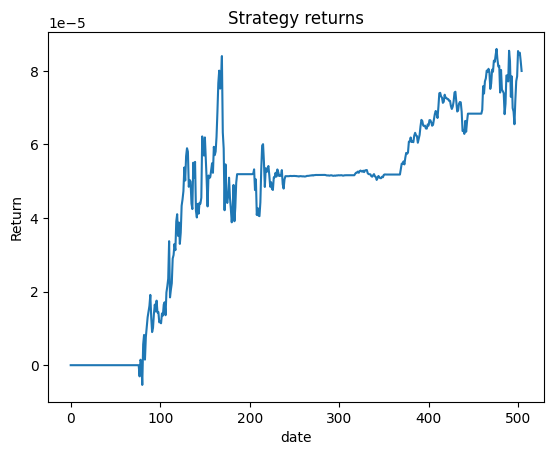

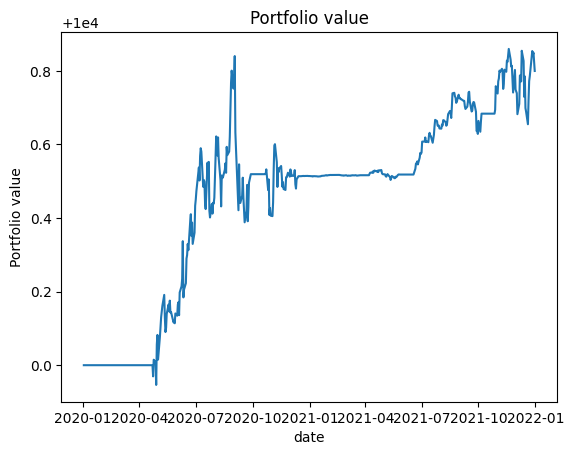

{'Total return': 7.996371620592982e-05, 'Sharpe ratio': nan}


In [45]:
# Load the data
# data = pd.read_csv("data.csv", index_col="date", parse_dates=True)
data = yf.download("MSFT", "2020-01-01", "2022-01-01")
data.columns = [x.lower() for x in data.columns]
data.index.name = 'date'

risk_manager = RiskManager(max_risk=1e3, stop_loss_pct=0.5)
visualizer = Visualizer()

backtest = Backtest(
    data, MovingAverageStrategy(20, 50), 10000, risk_manager, visualizer
)

# visualizer.plot_data(backtest.data, "underlying")

# Run the backtest
backtest.run()

# Print the performance
print(backtest.get_performance())

In [33]:
backtest.positions

[{'date': Timestamp('2021-10-27 00:00:00'),
  'Type': 'BUY',
  'Shares': 0.008822878346450784,
  'Price': 323.1700134277344}]